In [ ]:
!pip install rembg

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils
import cv2
from rembg import remove
from PIL import Image
from IPython.display import display

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

# Functions

## Display images

In [4]:
def display_image(img, title=None):
    """ Function to display an image
    Args:
        1) img - image object
        2) title - the title that will be displayed above the image
    Returns:
        None; but displays an image
    """
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [5]:
def display_original_augmented_img(original_img, augmented_img, original_title=None, augmented_title=None):
    """ Function to display the original and augmented image on the same graph
    Args:
        1) original_img - object of the original image
        2) augmented_img - augmented image object
        3) original_title - title for the original image
        4) augmented_title - title for the augmented image
    Returns:
        None; but displays images
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_img)
    axes[0].set_title(original_title)

    axes[1].imshow(augmented_img)
    axes[1].set_title(augmented_title)
    plt.show()

## Perform image augmentation using ImageDataGenerator

In [25]:
def get_ImageDataGen_image(imageDataGenerator, image):
  """ Function that returns an image augmented with imageDataGenerator
  Args:
    1) imageDataGenerator - an object of type ImageDataGenerator
    2) image - an image passed as a numpy array
  Returns:
    augmented_image
  """
  x = image.copy()
  x = np.expand_dims(x, axis=0)

  for batch in imageDataGenerator.flow(x, batch_size=1):
      augmented_image=batch[0].copy().astype(np.uint8)
      break

  return augmented_image

In [6]:
def perform_ImageDataGen_augmentation(imageDataGenerator, images, image_filenames, target_size,
                                      augm_prefix, num_augm_images=3, augm_images_dir_path=None,
                                      save_augm_image=True, display_orig_augm_images=False):
    """ Function to create augmented images from images using imageDataGenerator
    Args:
        1) imageDataGenerator - ImageDataGenerator class object
        2) images - a list of images, each of which is stored as a numpy array
        3) image_filenames - a list of image file names images (the names are used in the headers of the images that will be saved)
        4) target_size - the size of the images
        5) augm_prefix - prefix to be added to the beginning of the file name to indicate the augmentation technique
        6) num_augm_images - the number of instances of augmented images for one original
        7) augm_images_dir_path - the path to the folder where you want to save the augmented images (used if save_augm_image=True)
        8) save_augm_image - whether to save the augmented image
        9) display_orig_augm_images - whether to display the original and augmented image at the same time (original - left, augmented - right)
    Returns:
        None; but saves or displays augmented_images
    """
    augmented_index = 0
    for (image_name, img) in zip(image_filenames, images):
        x = img.copy()
        x = np.expand_dims(x, axis=0)

        i = 0
        for batch in datagen.flow(x, batch_size=1):
            i += 1
            if i > num_augmented_images:
                augmented_index = 0
                break

            augmented_image_name = f"{augm_prefix}_{image_name.split('.')[0]}_{augmented_index}.jpg"

            augmented_index += 1

            if save_augm_image and (augm_images_dir_path is not None):
                os.makedirs(augmented_images_dir, exist_ok=True)
                augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
                # tf.keras.preprocessing.image.save_img(augmented_image_path, batch[0])
                cv2.imwrite(augmented_image_path, cv2.cvtColor(batch[0].copy().astype(np.uint8), cv2.COLOR_BGR2RGB))
            if display_orig_augm_images:
                display_original_augmented_img(original_img=img, augmented_img=batch[0].copy().astype(np.uint8),
                                               original_title=f"Original_image: {image_name}",
                                               augmented_title=f"{augm_prefix}: {image_name}")

## Perform image augmentation using CV2

### Augmentation functions

In [7]:
def get_width_shift_image(image, width_shift_fraction):
    """ Function for performing width_shift augmentation over the image 'image'
    Args:
        1) image - an image passed as a numpy array
        2) width_shift_fraction - offset value ([-1; 1])
    Returns:
        augmented_image
    """
    # Get the height and width of the image
    height, width = image.shape[:2]

    # Calculate the height shift value
    width_shift = int(height * width_shift_fraction)

    # Calculate the new y-coordinate for height shift
    y_shifted = height // 2 + width_shift

    # Calculate the rotation matrix for height shift
    shift_matrix = np.float32([[1, 0, 0], [0, 1, width_shift]])

    # Apply the height shift to the image using warpAffine
    changed_image = cv2.warpAffine(image, shift_matrix, (width, height))
    return changed_image

In [8]:
def get_height_shift_image(image, height_shift_fraction):
    """ Function for performing height_shift augmentation over the image 'image'
    Args:
        1) image - an image passed as a numpy array
        2) height_shift_fraction - offset value ([-1; 1])
    Returns:
        augmented_image
    """
    # Get the height and width of the image
    height, width = image.shape[:2]

    # Calculate the height shift value
    height_shift = int(width * height_shift_fraction)

    # Calculate the new x-coordinate for height shift
    x_shifted = width // 2 + height_shift

    # Calculate the rotation matrix for height shift
    shift_matrix = np.float32([[1, 0, height_shift], [0, 1, 0]])

    # Apply the height shift to the image using warpAffine
    changed_image = cv2.warpAffine(image, shift_matrix, (width, height))
    return changed_image

In [ ]:
def get_brightness_augmentation_image(image, brightness_range=(0.5, 1.5)):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Generate a random brightness factor within the specified range
    brightness_factor = np.random.uniform(brightness_range[0], brightness_range[1])

    # Adjust the brightness by scaling the V channel
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * brightness_factor, 0, 255)

    # Convert the image back to the original color space (BGR)
    augmented_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return augmented_image

In [9]:
def get_contrast_augmentation_image(image, contrast_factor):
    """ Function for performing height_shift augmentation over the image 'image'
    Args:
        1) image - an image passed as a numpy array
        2) contrast_factor - adjusts the contrast of the image by applying CLAHE; possible values: [1.0; 4.0]
    Returns:
        augmented_image
    """
    # Convert the image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into L, A, and B channels
    l, a, b = cv2.split(lab)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L channel
    clahe = cv2.createCLAHE(clipLimit=contrast_factor, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge the CLAHE enhanced L channel with the original A and B channels
    limg = cv2.merge((cl, a, b))

    # Convert the LAB image back to BGR color space
    contrast_augmented_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return contrast_augmented_image

In [10]:
def get_hsv_image(image, hue_shift, saturation_scale=1, value_scale=1):
    """ Function to change the color tone of the image when switching to the HSV model
    Args:
        1) image - an image passed as a numpy array
        2) hue_shift - the value of the Hue parameter of the hsv model; possible values: [0; 179] (OpenCV)
        3) saturation_scale - coefficient by which the Saturation parameter of the HSV model will be multiplied
        4) value_scale - coefficient by which the Value parameter of the HSV model will be multiplied
    Returns:
        augmented_image
    """
    # Convert the original image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Apply the hue shift to the hue channel
    hsv_image[:, :, 0] = (hsv_image[:, :, 0] + hue_shift) % 180
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_scale, 0, 255)
    hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2] * value_scale, 0, 255)

    # Convert the image back to the RGB color space
    augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return augmented_image

In [11]:
def get_noisy_image(image, mean=1, std_dev=0.7):
    """ Function for adding random noise to the image 'image'
    Args:
        1) image - an image passed as a numpy array
        2) mean - the mean value of the noise
        3) std_dev - the standard deviation of the noise (the larger the std_dev, the more intense the noise will be)
    Returns:
        augmented_image
    """
    noise = np.random.normal(mean, std_dev, image.shape).astype('uint8')
    augmented_image = cv2.add(image, noise)

    return augmented_image

In [12]:
def remove_background(input_path, output_path=None):
    """ Function to remove the background from the image
    Args:
      1) input_path - the path to the image whose background should be removed
      2) output_path - the path to save an image without a background
    Returns:
      Image without background
    """
     # Processing the image
    input_image = Image.open(input_path)

    # Removing the background from the given Image
    output_image = remove(input_image)

    # Convert the output image to RGB mode (removing transparency)
    output_image = output_image.convert("RGB")

    if output_path:
      # Save the image with the background removed
      output_image.save(output_path)
    return output_image

In [13]:
def get_background_image(image, background_image, source_path, image_name, no_background_output_path=None):
  """ Function to replace the background of the original image with the background image background_image
  Args:
    1) image - an image passed as a numpy array
    2) background_image - background_image object
    3) source_path - path to image 'image'
    4) image_name - name of the image 'image'
    5) no_background_output_path - the path (along with the image name) to store the original image without the background
  Returns:
    augmented_image
  """
  if no_background_output_path is not None:
    pil_image = remove_background(input_path=os.path.join(source_path, image_name),
                    output_path=os.path.join(no_background_output_path, image_name))
  else:
    pil_image = remove_background(input_path=os.path.join(source_path, image_name))

  augmented_image = background_image.copy()

  # Convert PIL image to OpenCV format (NumPy array)
  image_without_background = np.array(pil_image)

  mask = cv2.cvtColor(image_without_background, cv2.COLOR_BGR2GRAY)
  _, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  garbage_area = cv2.bitwise_and(image_without_background, image_without_background, mask=mask)
  background_area = cv2.bitwise_and(augmented_image, augmented_image, mask=mask_inv)
  augmented_image = cv2.add(garbage_area, background_area)

  return augmented_image

### Augmentation algorithms

In [ ]:
def perform_cv2_rotation_augmentation(rotation_range, images, image_filenames,
                                      target_size, augm_prefix,
                                      num_augm_images=3, augm_images_dir_path=None,
                                      save_augm_image=True, display_orig_augm_images=False):
    """ Function to create augmented images from images using imageDataGenerator
    Args:
        1) rotation_range - the range (a list of two elements: [range_min; range_max]) in which the angle value will change linearly (depending on num_augm_images)
        2) images - a list of images, each of which is stored as a numpy array
        3) image_filenames - a list of image file names images (the names are used in the headers of the images that will be saved)
        4) target_size - the size of the images
        5) augm_prefix - prefix to be added to the beginning of the file name to indicate the augmentation technique
        6) num_augm_images - the number of instances of augmented images for one original
        7) augm_images_dir_path - the path to the folder where you want to save the augmented images (used if save_augm_image=True)
        8) save_augm_image - whether to save the augmented image
        9) display_orig_augm_images - whether to display the original and augmented image at the same time (original - left, augmented - right)
    Returns:
        None; but saves or displays augmented_images
    """
    height = target_size[0]
    width = target_size[1]
    angle_increment = int((rotation_range[1] - rotation_range[0]) / num_augm_images)
    for (image_name, img) in zip(image_filenames, images):
        augmented_index = 0
        angle = rotation_range[0]
        for i in range(num_augm_images):
            # Calculate the rotation matrix
            rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

            # Apply the rotation to the image using warpAffine
            augmented_image = cv2.warpAffine(img, rotation_matrix, (width, height))
            augmented_image_name = f"{augm_prefix}_{image_name.split('.')[0]}_{augmented_index}.jpg"
            augmented_index += 1
            angle += angle_increment
            if angle == 0:
                angle += angle_increment

            if save_augm_image and (augm_images_dir_path is not None):
                os.makedirs(augmented_images_dir, exist_ok=True)
                augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
                cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
            if display_orig_augm_images:
                display_original_augmented_img(original_img=img, augmented_img=augmented_image,
                                               original_title=f"Original_image: {image_name}",
                                               augmented_title=f"{augm_prefix}: {image_name}")

In [ ]:
def perform_cv2_flip_augmentation(flip_code, images, image_filenames,
                                  target_size, augm_prefix,
                                  num_augm_images=3, augm_images_dir_path=None,
                                  save_augm_image=True, display_orig_augm_images=False):
    """ Function to create augmented images from images using imageDataGenerator
    Args:
        1) flip_code - the type of flip augmentation to perform on the image: 0 - vertical, 1 - horizontal
        2) images - a list of images, each of which is stored as a numpy array
        3) image_filenames - a list of image file names images (the names are used in the headers of the images that will be saved)
        4) target_size - the size of the images
        5) augm_prefix - prefix to be added to the beginning of the file name to indicate the augmentation technique
        6) num_augm_images - the number of instances of augmented images for one original
        7) augm_images_dir_path - the path to the folder where you want to save the augmented images (used if save_augm_image=True)
        8) save_augm_image - whether to save the augmented image
        9) display_orig_augm_images - whether to display the original and augmented image at the same time (original - left, augmented - right)
    Returns:
        None; but saves or displays augmented_images
    """

    for (image_name, img) in zip(image_filenames, images):
        augmented_index = 0
        for i in range(num_augm_images):
            augmented_image = cv2.flip(img.copy(), flip_code)

            augmented_image_name = f"{augm_prefix}_{image_name.split('.')[0]}_{augmented_index}.jpg"
            augmented_index += 1

            if save_augm_image and (augm_images_dir_path is not None):
                os.makedirs(augmented_images_dir, exist_ok=True)
                augmented_image_path = os.path.join(augm_images_dir_path, augmented_image_name)
                cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
            if display_orig_augm_images:
                display_original_augmented_img(original_img=img, augmented_img=augmented_image,
                                               original_title=f"Original_image: {image_name}",
                                               augmented_title=f"{augm_prefix}: {image_name}")

# View test data

In [ ]:
source_path = '/content/garbage_classification/'
image_filenames = ['cardboard148.jpg', 'glass93.jpg', 'metal69.jpg', 'paper104.jpg', 'plastic118.jpg',
                  'trash28.jpg']
augmented_images_dir = '/content/garbage_classification_augmentation_test/'
show_images = True
images = []
for image_filename in image_filenames:
    img = cv2.imread(os.path.join(source_path, image_filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

    if show_images:
        display_image(img, title=image_filename)

# Perform image augmentation using ImageDataGenerator and cv2 algorithms

In [15]:
# Get the size of the image (height, width)
img_height, img_width = img.shape[:2]
print(f"img_height = {img_height}, img_width = {img_width}")

img_height = 384, img_width = 512


## rotation

### ImageDataGenerator -

In [ ]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 3

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_Rotation', num_augm_images=num_augmented_images,
                                  save_augm_image=True)

### CV2 algorithm +

In [ ]:
target_size = (img_height, img_width)
perform_cv2_rotation_augmentation(rotation_range=[-30, 30], images=images,
                                  image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_Rotation', num_augm_images=6,
                                  save_augm_image=True, display_orig_augm_images=True)

## width_shift

### ImageDataGenerator -

In [ ]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=(0.1, 0.1),
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 3

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_wShift', num_augm_images=num_augmented_images,
                                  save_augm_image=True)

### CV2 algorithm +

In [ ]:
width_shift_fraction = 0.1
for image, image_name in zip(images, image_filenames):
    augmented_image = get_width_shift_image(image=image, width_shift_fraction=width_shift_fraction)

    display_original_augmented_img(original_img=image, augmented_img=augmented_image,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"wShifted_img: {image_name}")
    augmented_image_name = f"aug_wShift_{image_name.split('.')[0]}_0.jpg"
    augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
    cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))

    augmented_image = get_width_shift_image(image=image, width_shift_fraction=(-width_shift_fraction))
    display_original_augmented_img(original_img=image, augmented_img=augmented_image,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"wShifted_img: {image_name}")
    augmented_image_name = f"aug_wShift_{image_name.split('.')[0]}_1.jpg"
    augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
    cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))

## height_shift

### ImageDataGenerator -

In [ ]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    height_shift_range=0.2,
    fill_mode='nearest'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_hShift', num_augm_images=num_augmented_images,
                                  save_augm_image=True)

### CV2 algorithm +

In [ ]:
height_shift_fraction = 0.15
for image, image_name in zip(images, image_filenames):
    augmented_image = get_height_shift_image(image=image, height_shift_fraction=height_shift_fraction)

    display_original_augmented_img(original_img=image, augmented_img=augmented_image,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"hShifted_img: {image_name}")
    augmented_image_name = f"aug_hShift_{image_name.split('.')[0]}_0.jpg"
    augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
    cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))

    augmented_image = get_height_shift_image(image=image, height_shift_fraction=(-height_shift_fraction))
    display_original_augmented_img(original_img=image, augmented_img=augmented_image,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"hShifted_img: {image_name}")
    augmented_image_name = f"aug_hShift_{image_name.split('.')[0]}_1.jpg"
    augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
    cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))

## horizontal_flip

### ImageDataGenerator -

In [ ]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_hFlip', num_augm_images=num_augmented_images,
                                  save_augm_image=False, display_orig_augm_images=True)

In [ ]:
for img, image_filename in zip(images, image_filenames):
    display_image(img, title=image_filename)

### CV2 algorithm +

In [ ]:
num_augmented_images = 1
perform_cv2_flip_augmentation(flip_code=1, images=images, image_filenames=image_filenames,
                              augm_images_dir_path=augmented_images_dir, target_size=target_size,
                              augm_prefix='aug_hFlip', num_augm_images=num_augmented_images,
                              save_augm_image=True, display_orig_augm_images=True)

## vertical_flip

### ImageDataGenerator -

In [ ]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    vertical_flip=True,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_vFlip', num_augm_images=num_augmented_images,
                                  save_augm_image=True, display_orig_augm_images=True)

### CV2 algorithm +

In [ ]:
num_augmented_images = 1
perform_cv2_flip_augmentation(flip_code=0, images=images, image_filenames=image_filenames,
                              augm_images_dir_path=augmented_images_dir, target_size=target_size,
                              augm_prefix='aug_vFlip', num_augm_images=num_augmented_images,
                              save_augm_image=True, display_orig_augm_images=True)

## zoom = scaling

### Enlarge the image (bring it closer to the viewer) - ImageDataGenerator +

In [ ]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    zoom_range=(0.8, 1),
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_iZoom', num_augm_images=num_augmented_images,
                                  save_augm_image=True, display_orig_augm_images=True)

### Reduce the image (move it away from the viewer) - ImageDataGenerator +

In [ ]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    zoom_range=(1, 1.2),
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_dZoom', num_augm_images=num_augmented_images,
                                  save_augm_image=True, display_orig_augm_images=True)

## brightness_shift

### ImageDataGenerator +

In [ ]:
datagen = ImageDataGenerator(
    brightness_range=(0.5, 0.5),
    fill_mode='nearest'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_blackBrightness', num_augm_images=num_augmented_images,
                                  save_augm_image=True, display_orig_augm_images=True)

In [ ]:
datagen = ImageDataGenerator(
    brightness_range=(1.25, 1.25),
    fill_mode='nearest'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames,
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size,
                                  augm_prefix='aug_ligthBrightness', num_augm_images=num_augmented_images,
                                  save_augm_image=True, display_orig_augm_images=True)

### CV2 algorithm

In [ ]:
augm_prefix = 'aug_blackBrightness'
for img, image_name in zip(images, image_filenames):
    changed_image = apply_brightness_augmentation(image=img, brightness_range=(0.5, 0.5))
    augmented_image_name = f"{augm_prefix}_{image_name.split('.')[0]}_0.jpg"
    cv2.imwrite(os.path.join(augmented_images_dir, augmented_image_name), cv2.cvtColor(changed_image, cv2.COLOR_BGR2RGB))
    display_original_augmented_img(original_img=img, augmented_img=changed_image,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"Brightness_img: {image_name}")

## contrast augmentation

In [ ]:
augm_prefix = 'aug_Contrast'
for image, image_name in zip(images, image_filenames):
    augmented_image = get_contrast_augmentation_image(image=image, contrast_factor=2.0)
    augmented_image_name = f"{augm_prefix}_{image_name.split('.')[0]}_0.jpg"
    cv2.imwrite(os.path.join(augmented_images_dir, augmented_image_name), cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    display_original_augmented_img(original_img=image, augmented_img=augmented_image,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"Brightness_img: {image_name}")

## backgrounds augmentation

### Unsuccessful attempt №1

In [ ]:
image_filepaths = [source_path_cardboard, source_path_glass, source_path_metal, source_path_paper, source_path_plastic,
                   source_path_trash]
image_filenames = ['cardboard148.jpg', 'glass93.jpg', 'metal69.jpg', 'paper104.jpg', 'plastic118.jpg',
                  'trash28.jpg']
augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

garbage_img = cv2.imread(os.path.join(image_filepaths[0], image_filenames[0]))
garbage_img = cv2.cvtColor(garbage_img, cv2.COLOR_BGR2RGB)

display_image(img=garbage_img, title=image_filenames[0])

# Get the size of the garbage image (height, width)
garbage_img_height, garbage_img_width = garbage_img.shape[:2]
print(f"garbage_img_height = {garbage_img_height}, garbage_img_width = {garbage_img_width}")

In [ ]:
background_image_filepath = 'data/backgrounds/'
background_image_names = os.listdir(background_image_filepath+'original/')
background_images = []
show_images = True

for background_image_name in background_image_names:
    background_image = cv2.imread(os.path.join(background_image_filepath+'original/', background_image_name))
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
    background_image = cv2.resize(background_image, (garbage_img_width, garbage_img_height))
    background_images.append(background_image)

    resized_image_name = f"{background_image_name.split('.')[0]}_reized.jpg"
    cv2.imwrite(os.path.join(background_image_filepath+'resized/', resized_image_name),
                cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB))
    if show_images:
        display_image(background_image, title=background_image_name)

In [ ]:
background_images[0].shape

In [ ]:
garbage_image = images[3]
background_image = background_images[0]

# Adjust the transparency (alpha channel) of the garbage image
alpha = 0.9  # Adjust this value between 0 (completely transparent) and 1 (completely opaque)
garbage_image = cv2.addWeighted(garbage_image, alpha, np.zeros_like(garbage_image), 1 - alpha, 0)

background_alpha = 0  # Adjust this value between 0 (completely transparent) and 1 (completely opaque)
background_image = cv2.addWeighted(background_image, alpha, np.zeros_like(background_image), 1 - background_alpha, 0)

# Overlay the resized garbage image onto the resized background image
augmented_image = cv2.addWeighted(background_image, 1, garbage_image, 1, 0)

display_image(augmented_image, title=background_image_names[0])

### Unsuccessful attempt №2

In [ ]:
image = images[4]
image_name = image_filenames[4]

# Remove the background
# Create a mask initialized with zeros
mask = np.zeros(image.shape[:2],np.uint8)

# Create the foreground and background models for GrabCut
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# Define a rectangle around the object to help GrabCut segment the image
rect = (10, 10, image.shape[1]-10, image.shape[0]-10)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create a binary mask for the foreground
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# Multiply the original image with the binary mask to get the foreground
result = image * mask2[:, :, np.newaxis]

display_original_augmented_img(original_img=image, augmented_img=result,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"No_background_img: {image_name}")

### Unsuccessful attempt №3

In [ ]:
background_image_filepath = 'data/backgrounds/resized'
background_image_names = os.listdir(background_image_filepath)
background_images = []
show_images = False

for background_image_name in background_image_names:
    background_image = cv2.imread(os.path.join(background_image_filepath, background_image_name))
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
    background_images.append(background_image)

    if show_images:
        display_image(background_image, title=background_image_name)

In [ ]:
image = images[2]
image_name = image_filenames[2]

background_image = background_images[0].copy()
background_image_name = background_image_names[0]
garbage_image = image

display_image(background_image, title=background_image_name)
# Remove background from the garbage image (assuming the background is white)
_, alpha = cv2.threshold(garbage_image[:, :, 0], 200, 255, cv2.THRESH_BINARY_INV)
garbage_image = cv2.merge((garbage_image[:, :, 0], garbage_image[:, :, 1], garbage_image[:, :, 2], alpha))

# Calculate position to overlay the garbage image on the background
x_pos = (background_image.shape[1] - garbage_image.shape[1]) // 2
y_pos = (background_image.shape[0] - garbage_image.shape[0]) // 2

# Create a mask for the garbage image
garbage_mask = garbage_image[:, :, 3] / 255.0

# Overlay the garbage image on the background
for c in range(0, 3):
    background_image[y_pos:y_pos+garbage_image.shape[0], x_pos:x_pos+garbage_image.shape[1], c] = \
        background_image[y_pos:y_pos+garbage_image.shape[0], x_pos:x_pos+garbage_image.shape[1], c] * (1.0 - garbage_mask) + \
        garbage_image[:, :, c] * garbage_mask

display_original_augmented_img(original_img=image, augmented_img=background_image,
                               original_title=f"Original_img: {image_name}",
                               augmented_title=f"Background_img: {image_name}")

### Successful Attempt №4

In [ ]:
background_image_filepath = '/content/backgrounds/'
background_image_names = os.listdir(background_image_filepath)
background_images = []
show_images = True

for background_image_name in background_image_names:
    if '.ipynb' in background_image_name:
      continue
    background_image = cv2.imread(os.path.join(background_image_filepath, background_image_name))
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
    background_images.append(background_image)

    if show_images:
        display_image(background_image, title=background_image_name)

In [ ]:
for image, image_name in zip(images, image_filenames):
  counter = 0
  for background_image in background_images:
    augmented_image = get_background_image(image=image, background_image=background_image,
                                           source_path=source_path, image_name=image_name)
    display_original_augmented_img(original_img=image,
                                  augmented_img=augmented_image,
                                  original_title=f"Original_img: {image_name}",
                                  augmented_title=f"aug_Background__img: {image_name}")
    output_name = f"aug_Background_{image_name.split('.')[0]}_{counter}.jpg"
    print(f"output_name = {output_name}")
    counter += 1

## color space transformations (HSV) augmentation

In [ ]:
augm_prefix = 'aug_hsv'
for image, image_name in zip(images, image_filenames):
    augmented_image = get_hsv_image(image=image, hue_shift=180)
    augmented_image_name = f"{augm_prefix}_{image_name.split('.')[0]}_0.jpg"
    cv2.imwrite(os.path.join(augmented_images_dir, augmented_image_name), cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    display_original_augmented_img(original_img=image, augmented_img=augmented_image,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"HSV_img: {image_name}")

## noise addition augmentation

In [ ]:
augm_prefix = 'aug_Noisy'
for image, image_name in zip(images, image_filenames):
    augmented_image = get_noisy_image(image=image)
    augmented_image_name = f"{augm_prefix}_{image_name.split('.')[0]}_0.jpg"
    cv2.imwrite(os.path.join(augmented_images_dir, augmented_image_name), cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    display_original_augmented_img(original_img=image, augmented_img=augmented_image,
                                   original_title=f"Original_img: {image_name}",
                                   augmented_title=f"Noisy_img: {image_name}")

## Reduce garbage image + background augmentation

In [ ]:
background_image_filepath = '/content/backgrounds/'
background_image_names = os.listdir(background_image_filepath)
background_images = []
show_images = True

for background_image_name in background_image_names:
    if '.ipynb' in background_image_name:
      continue
    background_image = cv2.imread(os.path.join(background_image_filepath, background_image_name))
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
    background_images.append(background_image)

    if show_images:
        display_image(background_image, title=background_image_name)

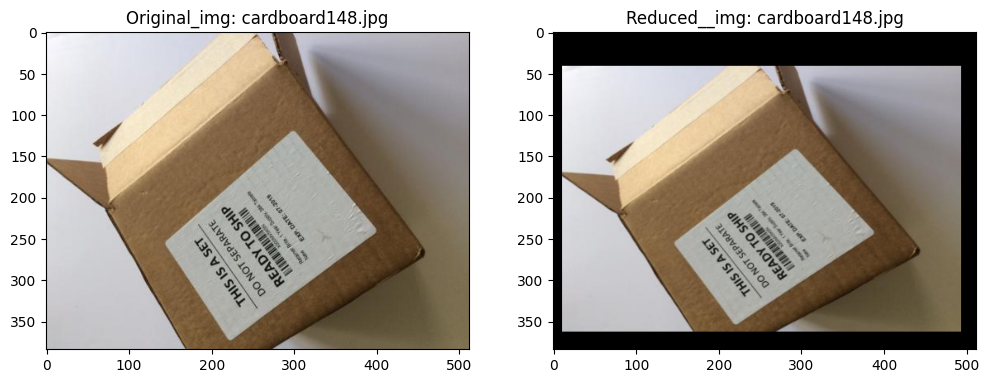

In [26]:
image, image_name = images[0], image_filenames[0]

datagen = ImageDataGenerator(
    zoom_range=(1, 1.2),
    fill_mode='constant'
)

augmented_image = get_ImageDataGen_image(imageDataGenerator=datagen, image=image)

display_original_augmented_img(original_img=image,
                               augmented_img=augmented_image,
                               original_title=f"Original_img: {image_name}",
                               augmented_title=f"Reduced__img: {image_name}")


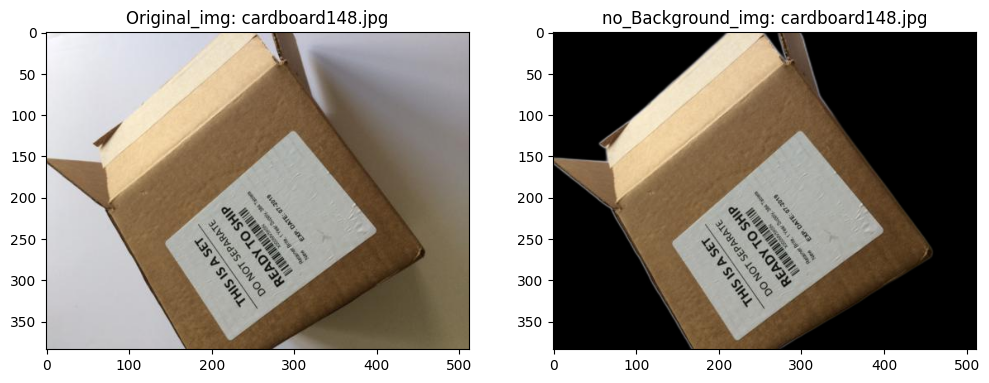

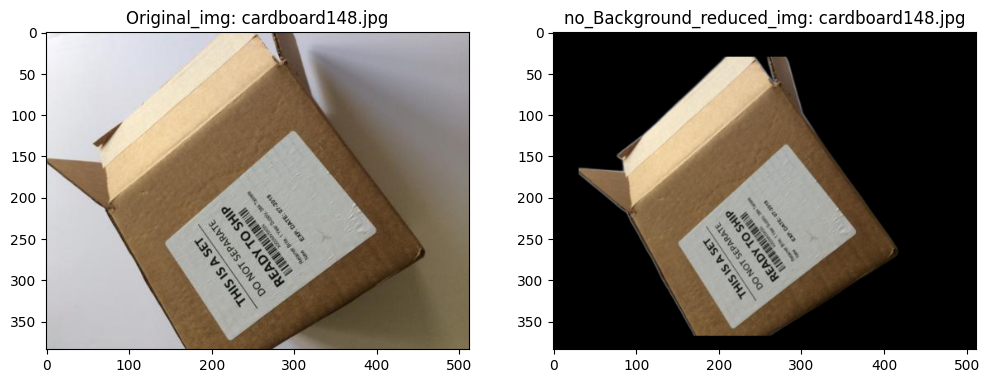

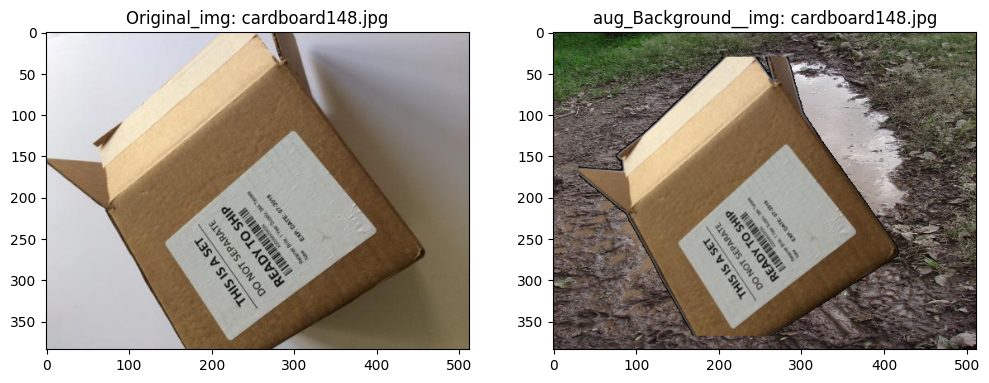

In [28]:
datagen = ImageDataGenerator(
    zoom_range=(1, 1.25),
    fill_mode='constant'
)

image, image_name = images[0], image_filenames[0]
pil_image = remove_background(input_path=os.path.join(source_path, image_name),
                    output_path=os.path.join('/content/garbages_without_background', image_name))

# Convert PIL image to OpenCV format (NumPy array)
image_without_background = np.array(pil_image)
display_original_augmented_img(original_img=image,
                                 augmented_img=image_without_background,
                                 original_title=f"Original_img: {image_name}",
                                 augmented_title=f"no_Background_img: {image_name}")

resized_image = get_ImageDataGen_image(imageDataGenerator=datagen, image=image_without_background)
display_original_augmented_img(original_img=image,
                                 augmented_img=resized_image,
                                 original_title=f"Original_img: {image_name}",
                                 augmented_title=f"no_Background_reduced_img: {image_name}")

background_image = background_images[0]
mask = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

garbage_area = cv2.bitwise_and(resized_image, resized_image, mask=mask)
augmented_image = background_image.copy()
background_area = cv2.bitwise_and(augmented_image, augmented_image,
                                  mask=mask_inv)
augmented_image = cv2.add(garbage_area, background_area)
display_original_augmented_img(original_img=image,
                               augmented_img=augmented_image,
                               original_title=f"Original_img: {image_name}",
                               augmented_title=f"aug_Background__img: {image_name}")